In [33]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore') 

In [35]:
# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]


In [37]:
df = pd.read_csv(url, names=columns)

In [38]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [39]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [45]:
print('Shape of Dataset: ', df.shape)
print('Rows: ', df.shape[0])
print('Columns: ', df.shape[1])

Shape of Dataset:  (19020, 11)
Rows:  19020
Columns:  11


In [47]:

df.describe().T

count        mean        std       min         25%        50%  \
fLength   19020.0   53.250154  42.364855    4.2835   24.336000   37.14770   
fWidth    19020.0   22.180966  18.346056    0.0000   11.863800   17.13990   
fSize     19020.0    2.825017   0.472599    1.9413    2.477100    2.73960   
fConc     19020.0    0.380327   0.182813    0.0131    0.235800    0.35415   
fConc1    19020.0    0.214657   0.110511    0.0003    0.128475    0.19650   
fAsym     19020.0   -4.331745  59.206062 -457.9161  -20.586550    4.01305   
fM3Long   19020.0   10.545545  51.000118 -331.7800  -12.842775   15.31410   
fM3Trans  19020.0    0.249726  20.827439 -205.8947  -10.849375    0.66620   
fAlpha    19020.0   27.645707  26.103621    0.0000    5.547925   17.67950   
fDist     19020.0  193.818026  74.731787    1.2826  142.492250  191.85145   

                 75%       max  
fLength    70.122175  334.1770  
fWidth     24.739475  256.3820  
fSize       3.101600    5.3233  
fConc       0.503700    0.8930  
fConc1      0.285225    0.6752  
fAsym      24.063700  575.2407  
fM3Long    35.837800  238.3210  
fM3Trans   10.946425  179.8510  
fAlpha     45.883550   90.0000  
fDist     240.563825  495.5610

In [49]:
df['class'].unique()


array(['g', 'h'], dtype=object)

In [51]:
df_copy=df.copy()

In [53]:
df_corr=df_copy.drop(columns=["class"])


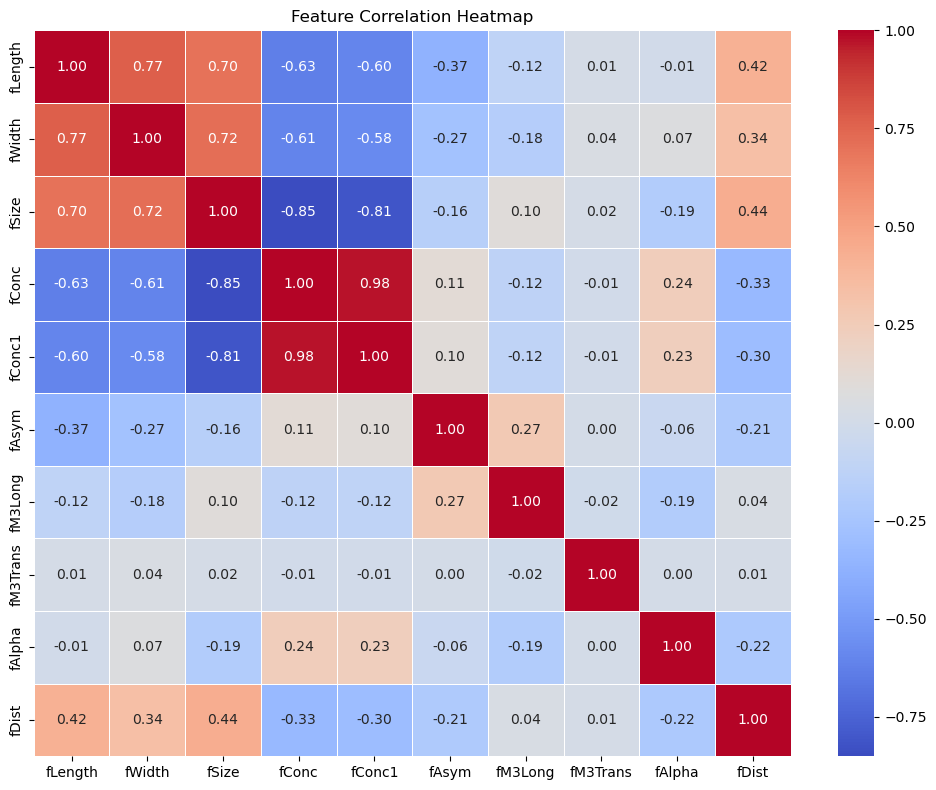

In [55]:
correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

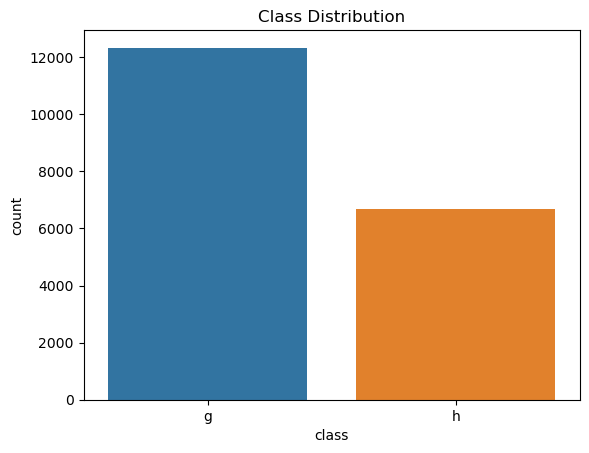

In [57]:
sns.countplot(x='class', data=df,hue='class')
plt.title('Class Distribution')
plt.show()

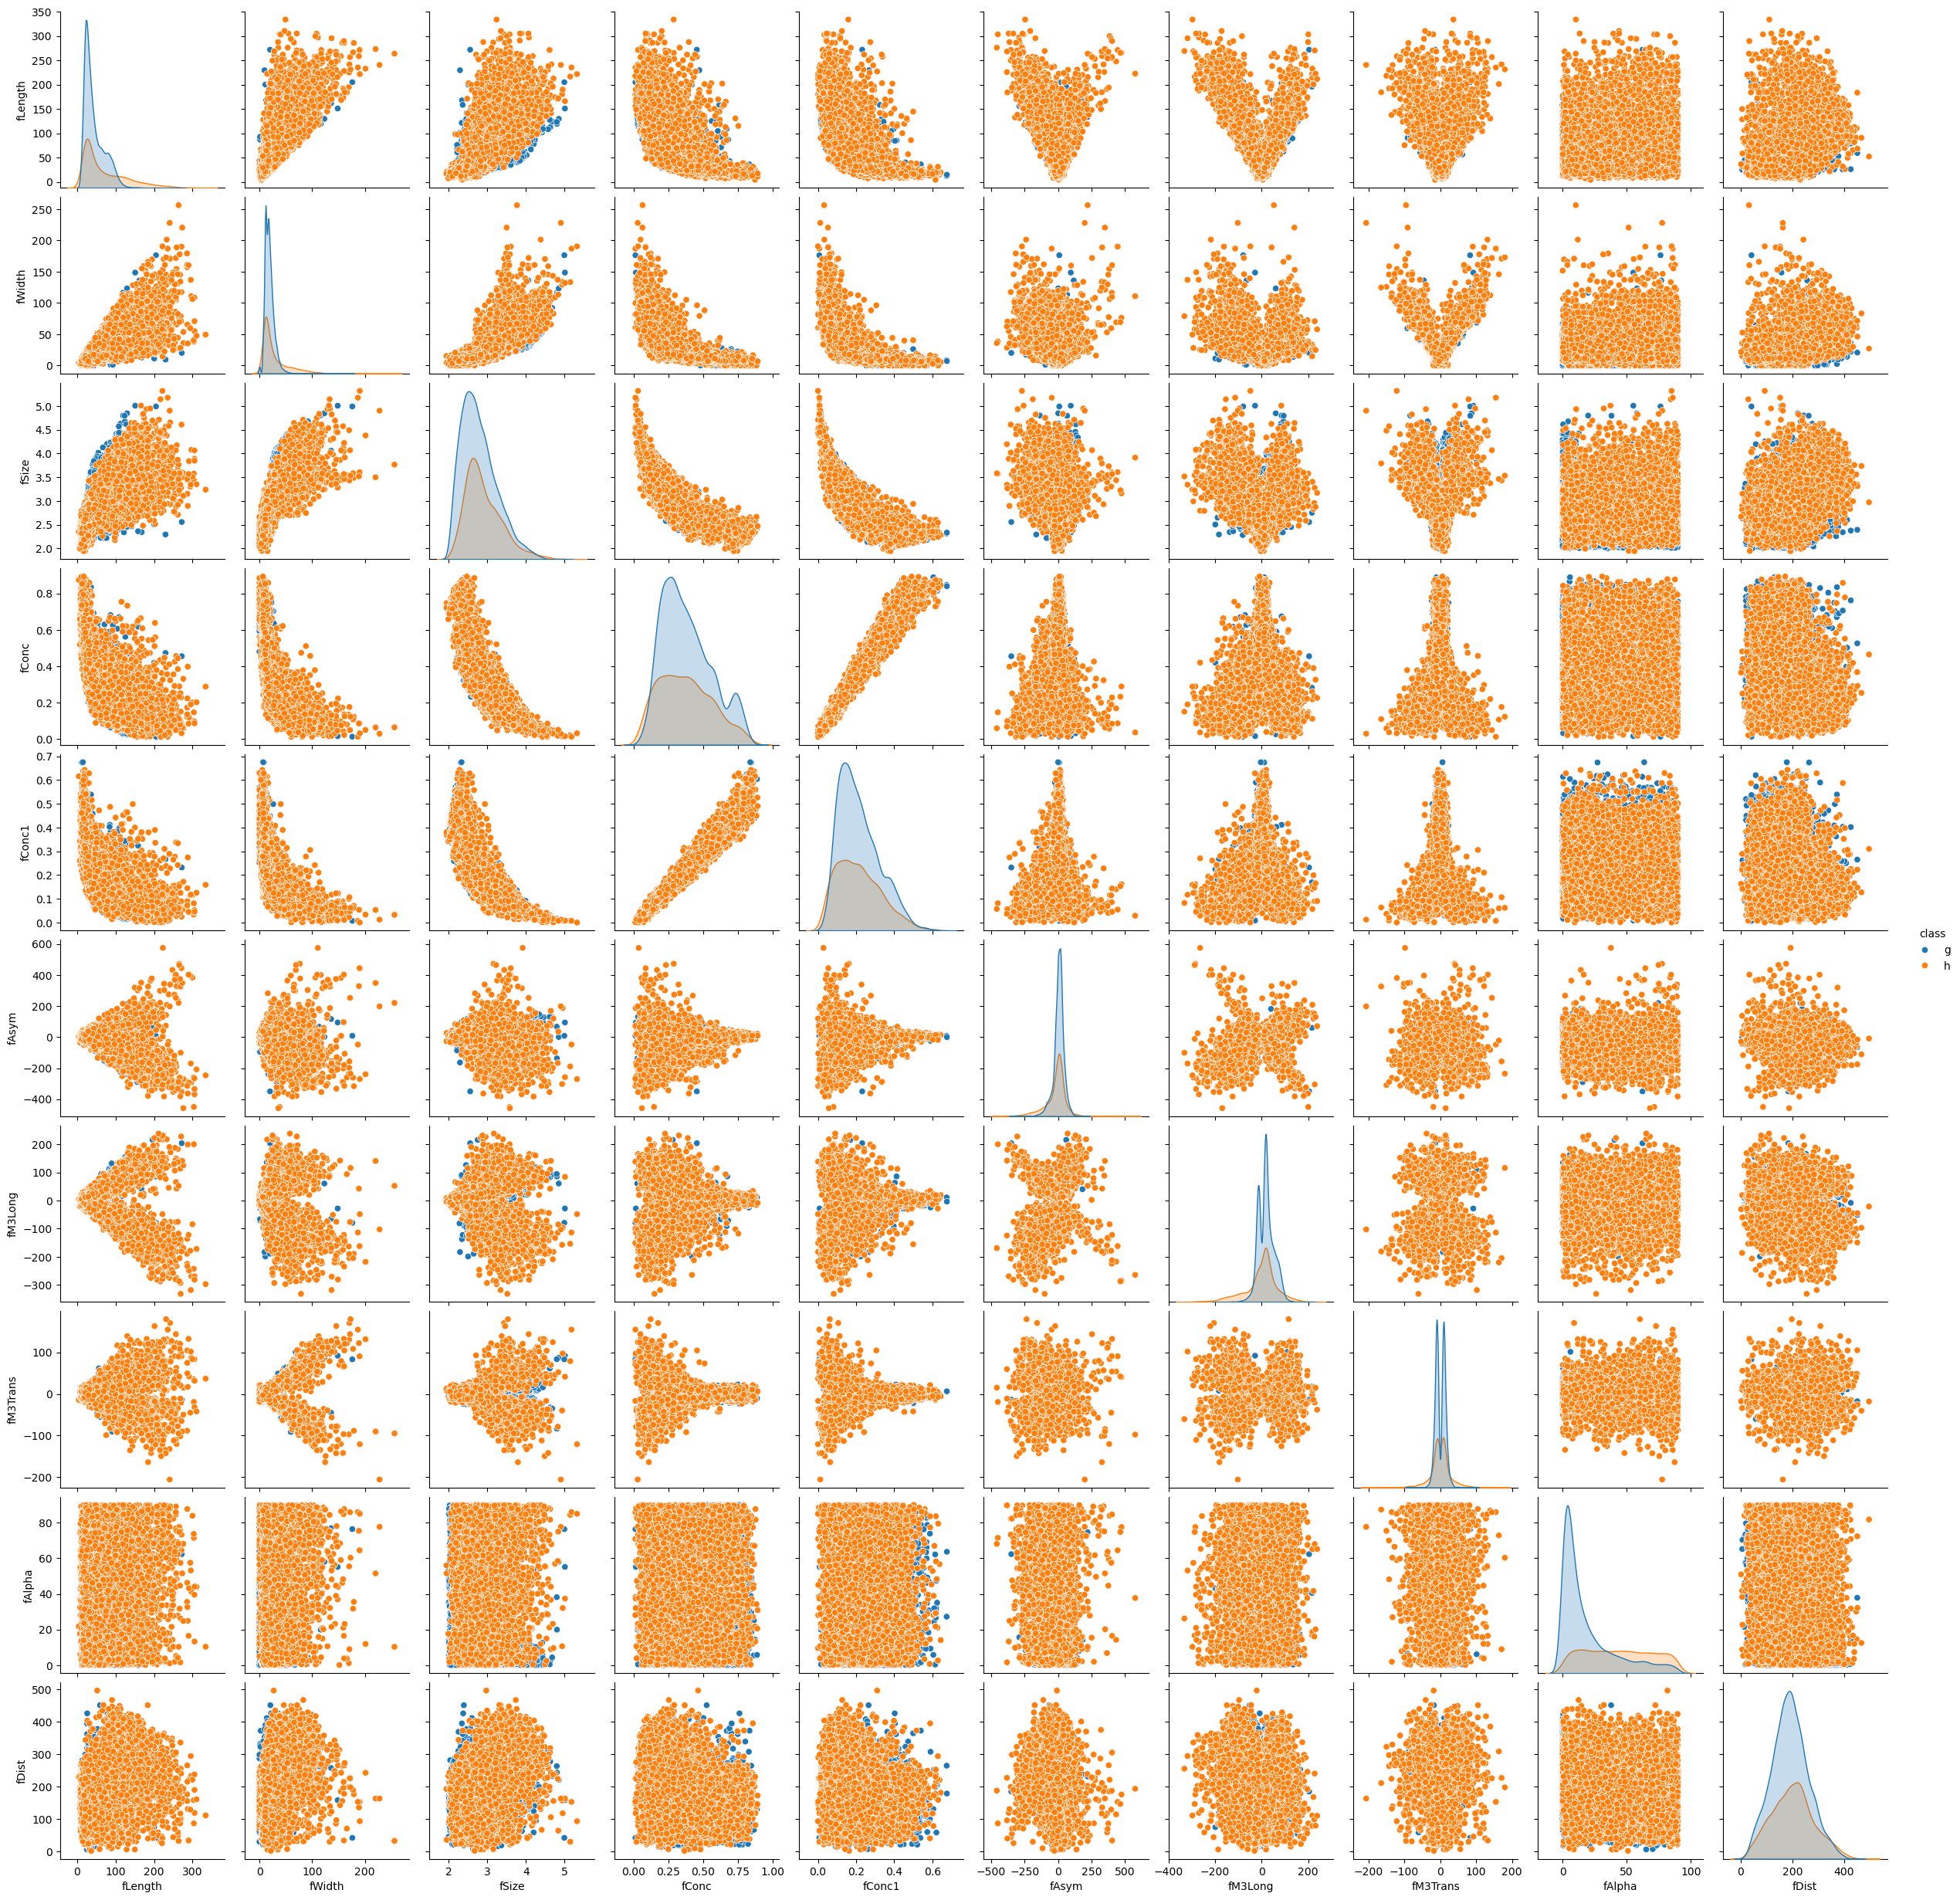

In [59]:
sns.pairplot(df, hue='class')

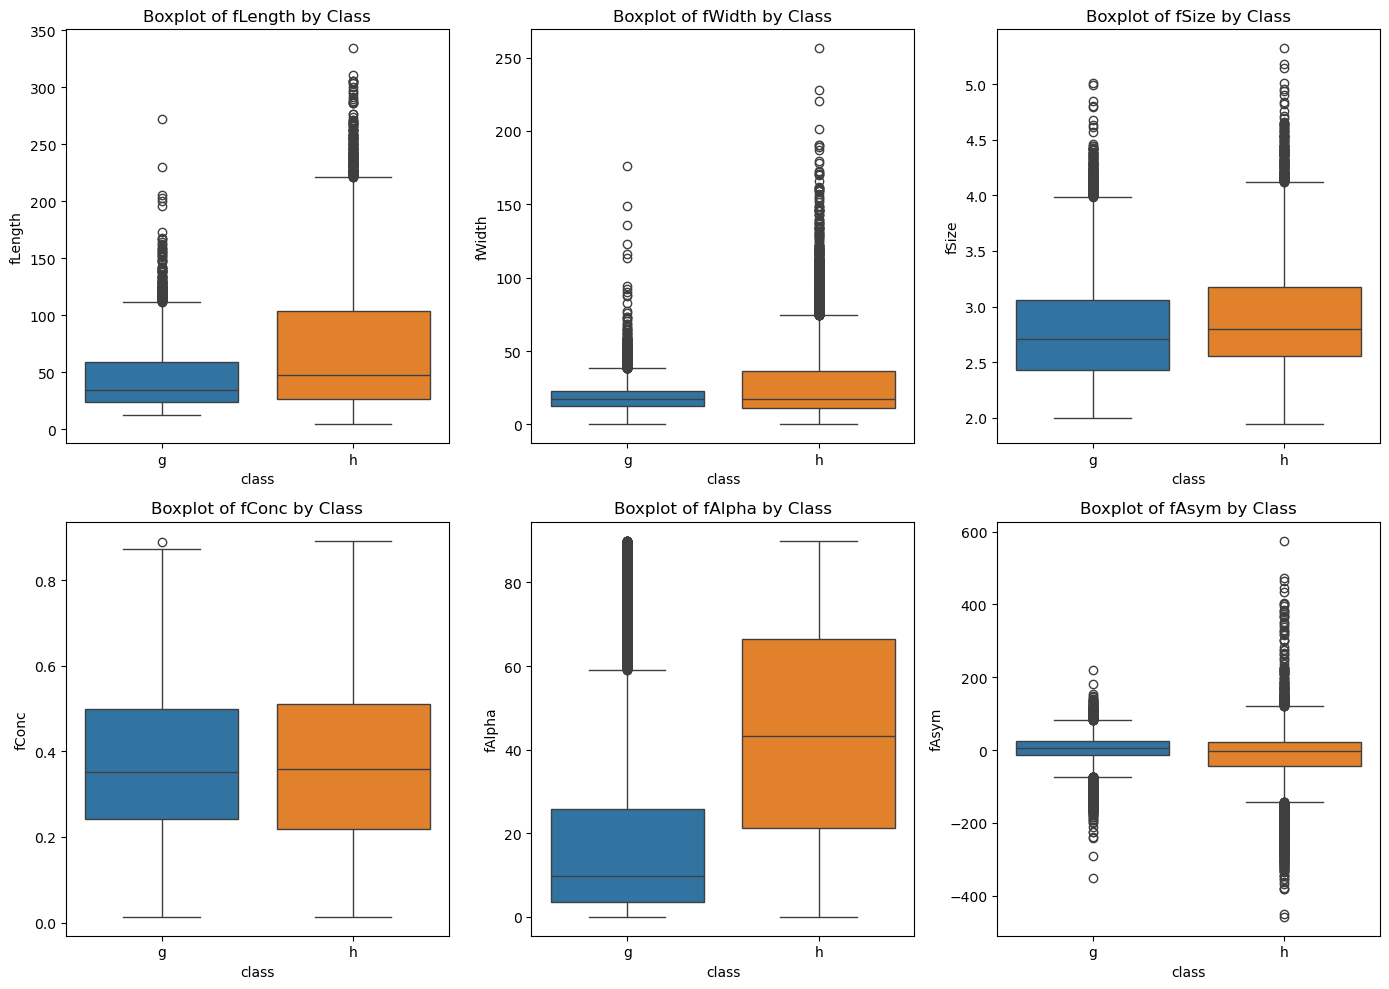

In [60]:
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fAlpha', 'fAsym']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='class', y=feature, data=df,hue='class')
    plt.title(f'Boxplot of {feature} by Class')
plt.tight_layout()
plt.show()


In [62]:

df["class"] = df["class"].map({"g": 1, "h": 0})


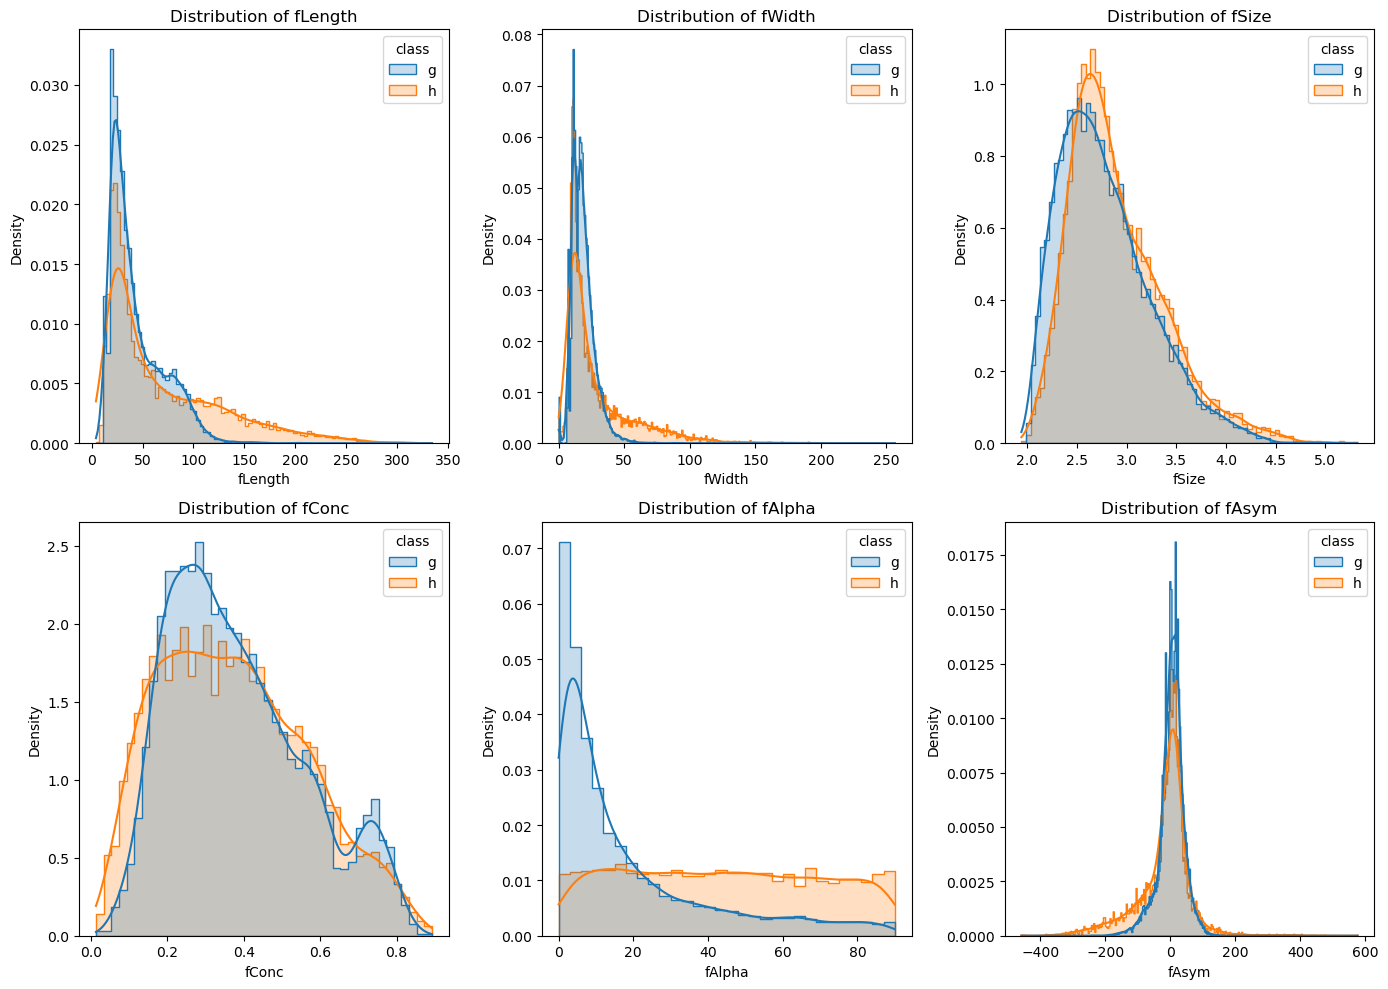

In [61]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='class', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [63]:
X = df.drop(columns=["class"])
y = df["class"]


In [64]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [66]:
svm_params_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, param_grid=svm_params_grid, cv=3).fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.8731598317560462


              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1344
           1       0.86      0.96      0.91      2460

    accuracy                           0.88      3804
   macro avg       0.89      0.84      0.86      3804
weighted avg       0.88      0.88      0.87      3804



<Axes: >

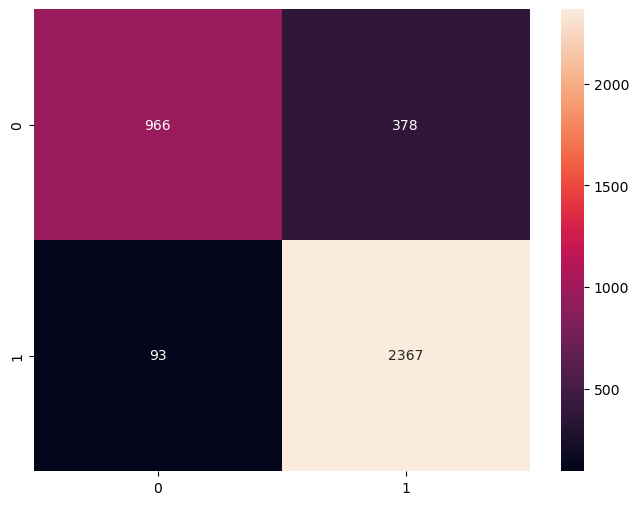

In [67]:
svm_prediction = svm_cv.predict(X_test)

cr = classification_report(y_test,svm_prediction)
print(cr)

cm = confusion_matrix(y_test,svm_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")

In [68]:
tree_params = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, tree_params, cv=3, scoring='accuracy')
tree_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8383280757097792


              precision    recall  f1-score   support

           0       0.80      0.63      0.71      1344
           1       0.82      0.91      0.86      2460

    accuracy                           0.81      3804
   macro avg       0.81      0.77      0.78      3804
weighted avg       0.81      0.81      0.81      3804



<Axes: >

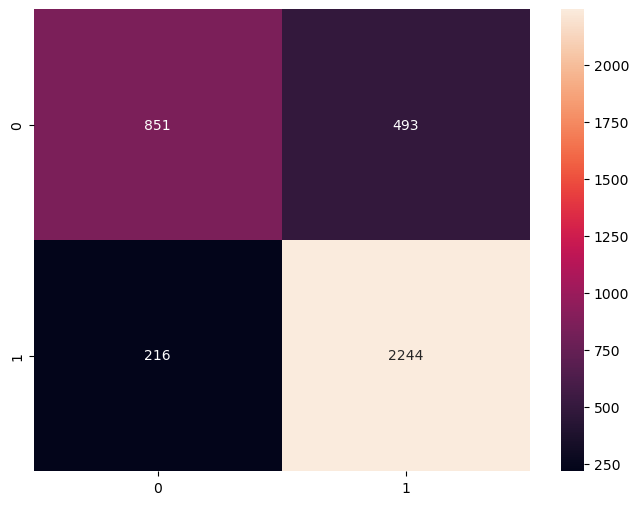

In [69]:
tree_prediction = tree_cv.predict(X_test)

cr = classification_report(y_test, tree_prediction)
print(cr)

cm = confusion_matrix(y_test,tree_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")

In [78]:
rfc_param_grid = {
    'n_estimators': [100, 10, 1, 0.1, 0.001],
    'max_depth': [None, 5, 10],
    'random_state': [None]
}


rfc = RandomForestClassifier()

rfc_cv = GridSearchCV(rfc, rfc_param_grid, cv=4, scoring='accuracy')
rfc_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ", rfc_cv.best_params_)
print("accuracy :", rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': None, 'n_estimators': 100, 'random_state': None}
accuracy : 0.8771687697160883


              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1344
           1       0.88      0.94      0.91      2460

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



<Axes: >

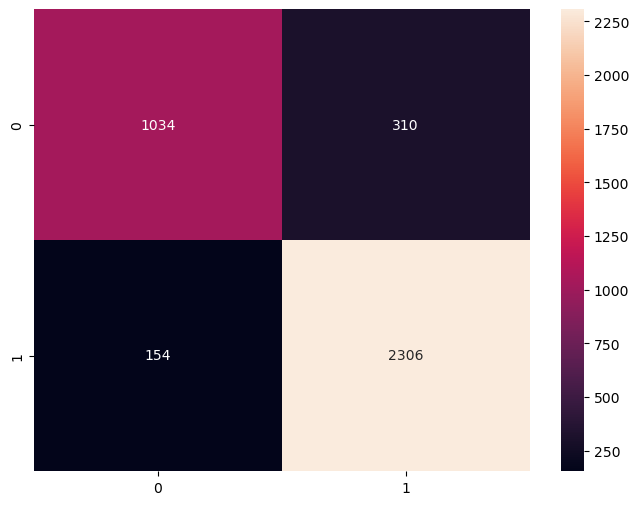

In [79]:
rfc_prediction = rfc_cv.predict(X_test)

cr = classification_report(y_test, rfc_prediction)
print(cr)

cm = confusion_matrix(y_test, rfc_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")

In [80]:
accuracy_scores =[
    accuracy_score(y_test, rfc_prediction),
    accuracy_score(y_test, svm_prediction),
    accuracy_score(y_test, tree_prediction)
]
precision_scores = [
    precision_score(y_test, rfc_prediction),
    precision_score(y_test, svm_prediction),
    precision_score(y_test, tree_prediction)
]

recall_scores = [  
    recall_score(y_test, rfc_prediction), 
    recall_score(y_test, svm_prediction),
    recall_score(y_test, tree_prediction)
]

f1_scores = [ 
    f1_score(y_test, rfc_prediction),
    f1_score(y_test, svm_prediction),
    f1_score(y_test, tree_prediction)
]

scores_df = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}, 
index=['Random Forest',  'Support Vector Machine', 'Decision Tree'])
print(scores_df.to_string(index=True))


                        Accuracy  Precision    Recall  F1 Score
Random Forest           0.878023   0.881498  0.937398  0.908589
Support Vector Machine  0.876183   0.862295  0.962195  0.909510
Decision Tree           0.813617   0.819876  0.912195  0.863575


In [83]:


models = {
              'Random Forest':rfc_cv.best_score_,
              'Support Vector Machine': svm_cv.best_score_,
              'Decision Tree': tree_cv.best_score_
}

bestalgorithm = max(models, key=models.get)
print('Best model is', bestalgorithm,'with a score of', models[bestalgorithm])
if bestalgorithm == 'Random Forest':
    print('Best params is :', rfc_cv.best_params_)
if bestalgorithm == 'Support Vector Machine':
    print('Best params is :', svm_cv.best_params_)
if bestalgorithm == 'Decision Tree':
    print('Best params is :', tree_cv.best_params_)

Best model is Random Forest with a score of 0.8771687697160883
Best params is : {'max_depth': None, 'n_estimators': 100, 'random_state': None}
